In [1]:
import pandas as pd
import numpy as np

csv_file = '../ro_uart_logs/ro_log.csv'


df = pd.read_csv(csv_file)

df = df[45000:65000]




# Step 1: Prepare the Data
# Assuming your dataframe is named 'df' and the column containing the integers is named 'values'

# Generate a time or index column if not already present
df['time'] = pd.to_datetime(range(len(df)), unit='s')

# Step 2: Perform Fourier Transform
values = df['RO_VALUES'].values
fft = np.fft.fft(values)

# Calculate the magnitudes of the frequency components
magnitudes = np.abs(fft)

# Calculate the frequencies corresponding to each component
n = len(df)
timestep = 1  # Assuming a unit timestep between data points
frequencies = np.fft.fftfreq(n, d=timestep)

# Step 3: Identify Dominant Frequencies
# Sort the frequencies and magnitudes by magnitude in descending order
sorted_indices = np.argsort(magnitudes)[::-1]
sorted_frequencies = frequencies[sorted_indices]
sorted_magnitudes = magnitudes[sorted_indices]

# Determine the number of dominant frequencies to consider
num_dominant_freqs = 2  # Adjust this based on your data and requirements

# Select the top dominant frequencies
dominant_frequencies = sorted_frequencies[:num_dominant_freqs]

# # Step 4: Partition the Data
# # Define frequency ranges or thresholds for segmenting the data
# frequency_ranges = [(0, 0.01), (0.01, 0.05), (0.05, 0.1)]  # Example ranges

# # Step 5: Extract Segments
# segmented_data = {}

# # Iterate over the frequency ranges and extract segments
# for i, (freq_start, freq_end) in enumerate(frequency_ranges):
#     # Find indices of frequencies within the specified range
#     indices = np.where((dominant_frequencies >= freq_start) & (dominant_frequencies < freq_end))[0]
    
#     # Extract the corresponding frequency components
#     selected_indices = sorted_indices[indices]
#     selected_frequencies = dominant_frequencies[indices]
#     selected_magnitudes = sorted_magnitudes[indices]
#     selected_fft = fft.copy()
#     selected_fft[np.logical_not(np.isin(range(n), selected_indices))] = 0
    
#     # Apply inverse Fourier transform to obtain the segmented data
#     segmented_values = np.real(np.fft.ifft(selected_fft))
    
#     # Create a new dataframe or array to store the segmented data
#     segmented_data[f"Segment {i+1}"] = segmented_values

# # Optional: Convert segmented data to pandas dataframes if desired
# segmented_dfs = {segment: pd.DataFrame({'time': df['time'], 'values': values})
#                  for segment, values in segmented_data.items()}

# # Step 6: Perform Further Analysis
# # You can now perform any additional analysis or processing on each segmented dataframe

# # Example: Print the first few rows of each segmented dataframe
# for segment, segmented_df in segmented_dfs.items():
#     print(f"Segment: {segment}")
#     print(segmented_df.head())
#     print()

In [2]:
dominant_frequencies

array([ 0.     , -0.29365])

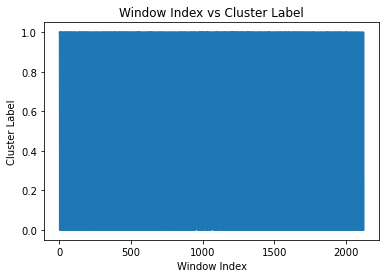

In [6]:
import matplotlib.pyplot as plt
window_indices = np.arange(0, num_windows)
plt.plot(window_indices, clusters)
plt.xlabel('Window Index')
plt.ylabel('Cluster Label')
plt.title('Window Index vs Cluster Label')
plt.show()